### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [5]:
import pandas as pd
vehicle = pd.read_csv("vehicle.csv")
vehicle.shape


(846, 19)

In [6]:
vehicle.info()vehicle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [41]:
vehicle.dropna(inplace=True)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

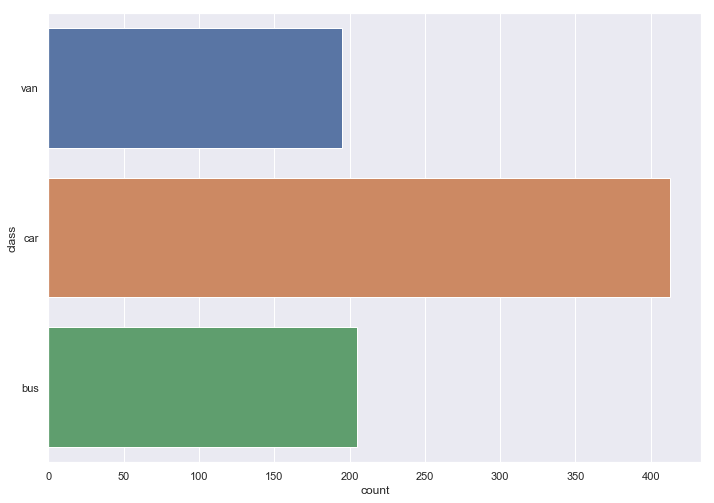

In [42]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='class', data=vehicle)

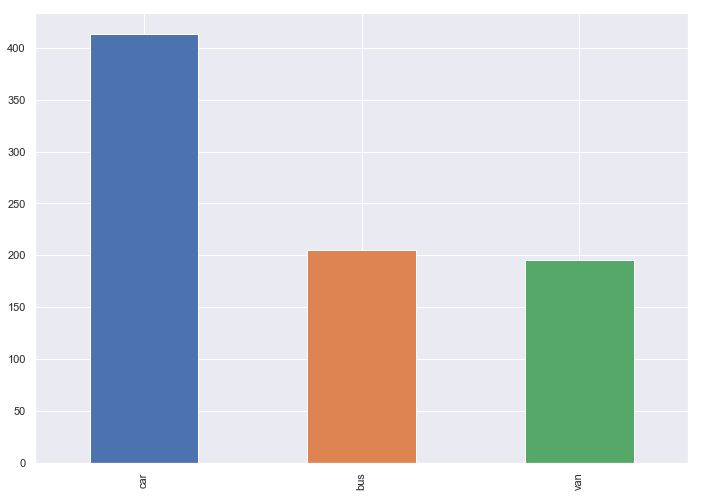

In [43]:
pd.value_counts(vehicle['class']).plot.bar()

### Check for any missing values in the data 

In [44]:
vehicle.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [47]:
from scipy.stats import zscore
vehicle_t = vehicle.drop(labels= "class" , axis = 1)
vehicle_attributes = vehicle_t.apply(zscore)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [70]:
meanDistortions=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [71]:
from sklearn.model_selection  import train_test_split
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [72]:
clusters=range(1,10)
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(vehicle_attributes)
    prediction=model.predict(vehicle_attributes)    
    meanDistortions.append(sum(np.min(cdist(vehicle_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / vehicle_attributes.shape[0])


In [73]:
meanDistortions

[3.939299196727955,
 2.966824380205441,
 2.642794199692158,
 2.548617081764424,
 2.4287421003290626,
 2.31533040920016,
 2.242425552425044,
 2.1696996079268662,
 2.113127641060848]

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

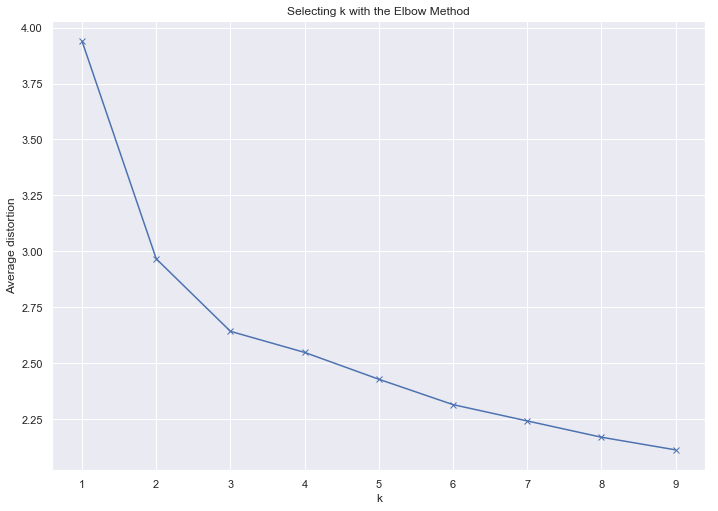

In [74]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Find out the optimal value of K

from the elbow plot we can make out,optimal value is k=3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [81]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(vehicle_attributes)
prediction=cluster.predict(vehicle_attributes)
vehicle_attributes_copy = vehicle_attributes.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly
prediction


array([[-2.33961699e-01, -5.73874806e-01, -3.07769051e-01,
        -3.04132202e-02,  2.05072596e-01, -1.16531512e-01,
        -4.59041814e-01,  3.25063290e-01, -4.87988361e-01,
        -5.36044463e-01, -4.13809352e-01, -4.63663055e-01,
        -6.01550311e-01, -6.19240573e-01, -6.17796895e-02,
         1.06676194e-02,  8.12785556e-01,  6.98972986e-01,
         3.10862447e-15],
       [ 1.13076532e+00,  1.17094237e+00,  1.19500584e+00,
         1.01909505e+00,  2.15051876e-01,  3.42507981e-01,
         1.27180461e+00, -1.19061224e+00,  1.27548416e+00,
         1.09266768e+00,  1.22038121e+00,  1.28132727e+00,
         1.07954232e+00, -2.87949716e-02,  1.62290314e-01,
         2.65664558e-01, -5.35552943e-03,  1.83800671e-01,
         1.00000000e+00],
       [-9.19870718e-01, -5.20092511e-01, -8.93207522e-01,
        -1.06435572e+00, -5.00421709e-01, -2.19073799e-01,
        -7.79121301e-01,  8.65893224e-01, -7.45356355e-01,
        -4.84632001e-01, -7.82403279e-01, -7.83410644e-01,
    

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5B32F51D0>,
      dtype=object)

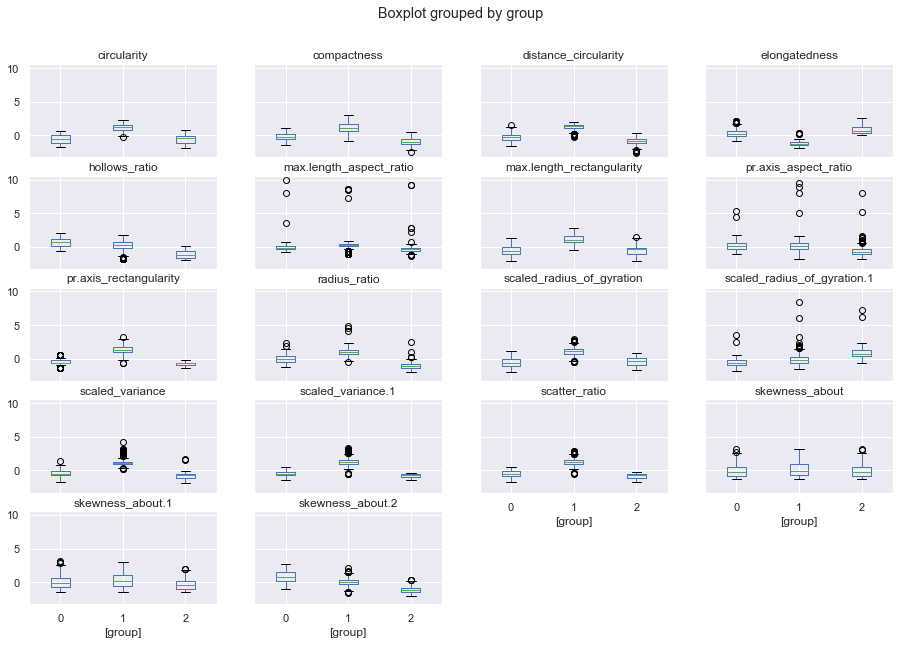

In [80]:
vehicle_attributes["group"] = prediction
vehicle_attributes.boxplot(by = 'group', figsize=(15, 10))

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [82]:
centroids = cluster.cluster_centers_
centroids

array([[-2.33961699e-01, -5.73874806e-01, -3.07769051e-01,
        -3.04132202e-02,  2.05072596e-01, -1.16531512e-01,
        -4.59041814e-01,  3.25063290e-01, -4.87988361e-01,
        -5.36044463e-01, -4.13809352e-01, -4.63663055e-01,
        -6.01550311e-01, -6.19240573e-01, -6.17796895e-02,
         1.06676194e-02,  8.12785556e-01,  6.98972986e-01,
         3.10862447e-15],
       [ 1.13076532e+00,  1.17094237e+00,  1.19500584e+00,
         1.01909505e+00,  2.15051876e-01,  3.42507981e-01,
         1.27180461e+00, -1.19061224e+00,  1.27548416e+00,
         1.09266768e+00,  1.22038121e+00,  1.28132727e+00,
         1.07954232e+00, -2.87949716e-02,  1.62290314e-01,
         2.65664558e-01, -5.35552943e-03,  1.83800671e-01,
         1.00000000e+00],
       [-9.19870718e-01, -5.20092511e-01, -8.93207522e-01,
        -1.06435572e+00, -5.00421709e-01, -2.19073799e-01,
        -7.79121301e-01,  8.65893224e-01, -7.45356355e-01,
        -4.84632001e-01, -7.82403279e-01, -7.83410644e-01,
    

In [98]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_attributes) )
centroid_df.T

,0,1,2
compactness,-2.339617e-01,1.130765,-0.919871
circularity,-5.738748e-01,1.170942,-0.520093
distance_circularity,-3.077691e-01,1.195006,-0.893208
radius_ratio,-3.041322e-02,1.019095,-1.064356
pr.axis_aspect_ratio,2.050726e-01,0.215052,-0.500422
max.length_aspect_ratio,-1.165315e-01,0.342508,-0.219074
scatter_ratio,-4.590418e-01,1.271805,-0.779121
elongatedness,3.250633e-01,-1.190612,0.865893
pr.axis_rectangularity,-4.879884e-01,1.275484,-0.745356
max.length_rectangularity,-5.360445e-01,1.092668,-0.484632


### Use kmeans.labels_ function to print out the labels of the classes

In [88]:
 cluster.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [105]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

In [106]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [121]:
df = np.concatenate([a,b,c])
df = pd.DataFrame(df)
df.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5B13E17B8>,
      dtype=object)

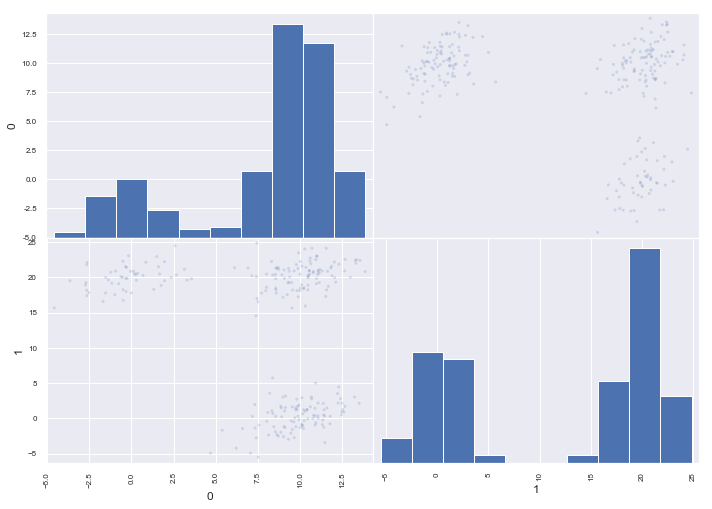

In [123]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2)

### 11. Find out the linkage matrix

In [128]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

Use ward as linkage metric and distance as Eucledian

In [133]:
Z = linkage(df, 'ward')
Z

array([[1.96000000e+02, 2.14000000e+02, 4.91465981e-02, 2.00000000e+00],
       [1.95000000e+02, 2.38000000e+02, 5.03144782e-02, 2.00000000e+00],
       [4.90000000e+01, 9.50000000e+01, 5.58269840e-02, 2.00000000e+00],
       [2.03000000e+02, 2.08000000e+02, 7.67095460e-02, 2.00000000e+00],
       [1.09000000e+02, 1.28000000e+02, 8.10113862e-02, 2.00000000e+00],
       [1.53000000e+02, 1.55000000e+02, 1.01289834e-01, 2.00000000e+00],
       [1.30000000e+01, 2.80000000e+01, 1.05593465e-01, 2.00000000e+00],
       [2.40000000e+01, 8.60000000e+01, 1.07949902e-01, 2.00000000e+00],
       [1.04000000e+02, 1.05000000e+02, 1.10084780e-01, 2.00000000e+00],
       [5.80000000e+01, 8.40000000e+01, 1.15805896e-01, 2.00000000e+00],
       [1.10000000e+02, 1.16000000e+02, 1.16572791e-01, 2.00000000e+00],
       [2.06000000e+02, 2.39000000e+02, 1.25224682e-01, 2.00000000e+00],
       [2.50000000e+01, 8.00000000e+01, 1.33616601e-01, 2.00000000e+00],
       [4.80000000e+01, 8.50000000e+01, 1.50324739e

In [132]:
c, coph_dists = cophenet(Z , pdist(df))

c

0.9567529386560059

### 12. Plot the dendrogram for the consolidated dataframe

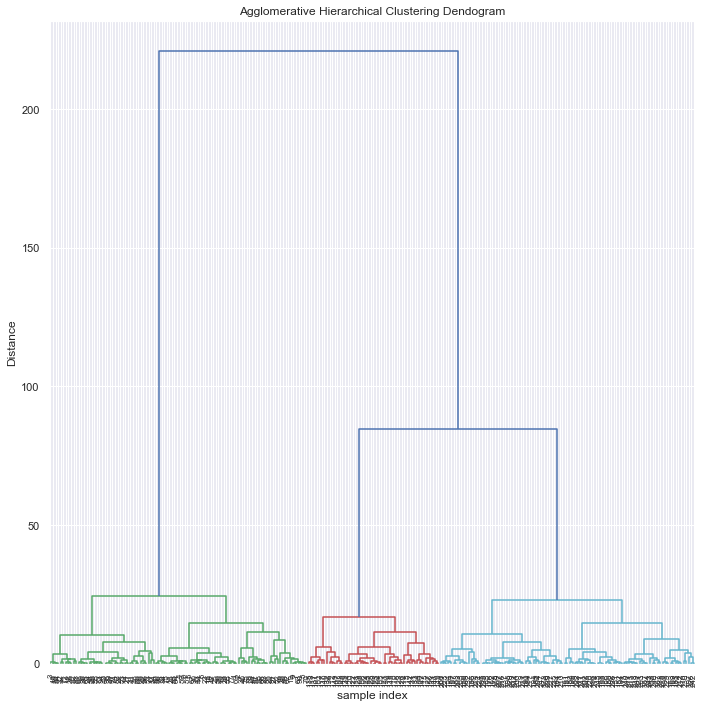

In [134]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

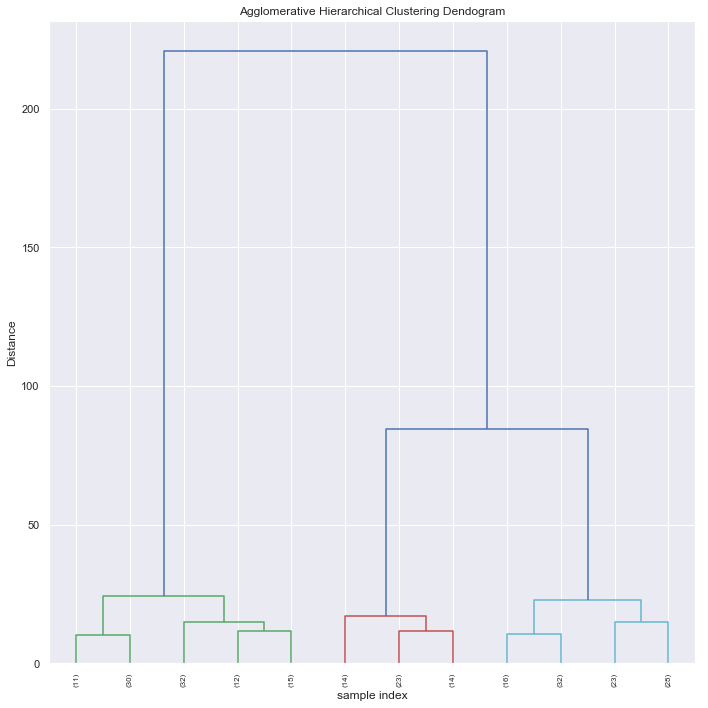

In [137]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.,truncate_mode='lastp', p= 12)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

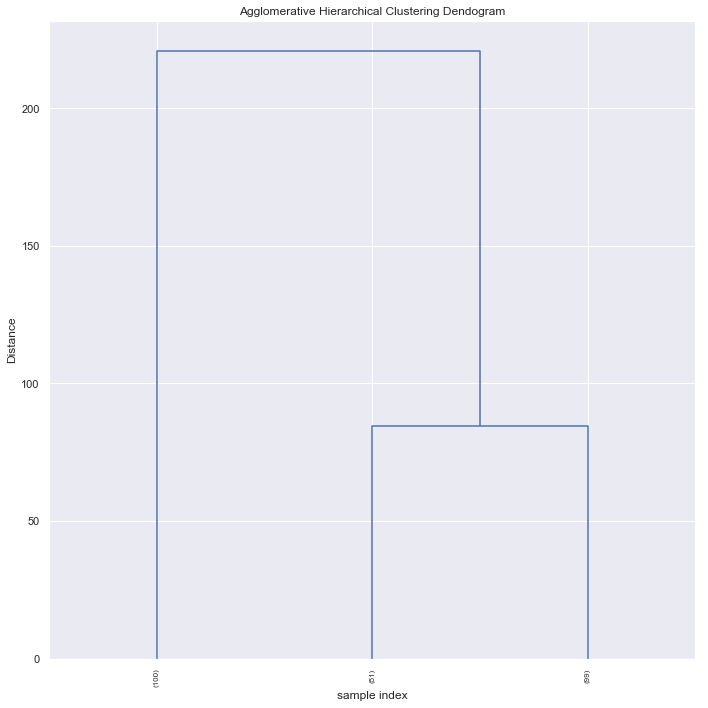

In [140]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.,truncate_mode='lastp', p= 3)
plt.tight_layout()

optimal distance is 51

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [141]:
 from scipy.cluster.hierarchy import fcluster 

In [143]:
arr = fcluster(Z, 50, criterion='distance')
arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

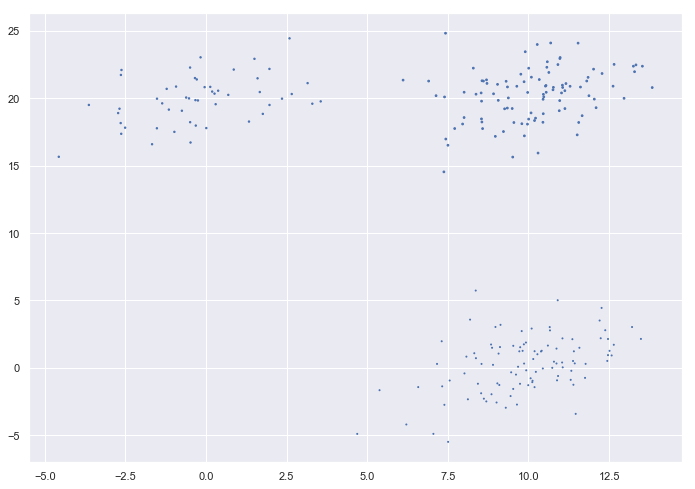

In [147]:
plt.scatter(df[0],df[1],arr)